# Plots for Gaza to assess how the model reacted to the onset of the Israel-Hamas conflict 2023

**Reads in data from the internal VIEWS database, authorization required.**

In [117]:
#To plot
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.animation import PillowWriter
from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from textwrap import wrap
from scipy import interpolate
from matplotlib import gridspec
from matplotlib import cm
import matplotlib.ticker as ticker
import matplotlib.colors as mcolors

import seaborn as sns

#To fetch url 
import requests
import json

# sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Views 3
from viewser.operations import fetch
from viewser import Queryset, Column
import views_runs
from views_partitioning import data_partitioner, legacy
from stepshift import views
from views_runs import storage, ModelMetadata
from views_runs.storage import store, retrieve, fetch_metadata
from views_forecasts.extensions import *

# For mapping 
import os
from views_mapper2.mapper2 import *
from views_mapper2.BBoxWriter import *
from views_mapper2.dictionary_writer import *
from views_mapper2.label_writer import *
from ingester3.extensions import *

In [93]:
import os
home = os.path.expanduser("~")
desktop = home+'/Desktop/Gaza2023/final' # (Toggle on to save to desktop)

In [94]:
def vid2date(i):
    year=str(1980 + i//12)
    month=str(i%12)
    return year+'/'+month

In [95]:
# Print month_ids for the chosen period

print(ViewsMonth.from_year_month(year=2023, month=1)) 

ViewsMonth(id=517) #=> year:2023, month:1


In [96]:
StartOfHistory=469 # 469 is january 2019, change as needed
EndOfHistory=526 # Change as needed

In [235]:
#cm_ensemble=ViewsMetadata().with_name('cm_genetic_ensemble_f').fetch() shows all available months for the model
# Fetching calibration, test and future data for fatalities002

calib_run_id = 46

calib = pd.DataFrame.forecasts.read_store(run=calib_run_id, name='cm_ensemble_genetic_calib')
test = pd.DataFrame.forecasts.read_store(run=calib_run_id, name='cm_ensemble_genetic_test')
future526 = pd.DataFrame.forecasts.read_store(run=calib_run_id, name='cm_genetic_ensemble_f526')
future525=pd.DataFrame.forecasts.read_store(run=calib_run_id, name='cm_genetic_ensemble_f525')
future524=pd.DataFrame.forecasts.read_store(run=calib_run_id, name='cm_genetic_ensemble_f524')
future523=pd.DataFrame.forecasts.read_store(run=calib_run_id, name='cm_genetic_ensemble_f523')
future522=pd.DataFrame.forecasts.read_store(run=calib_run_id, name='cm_genetic_ensemble_f522')
future521=pd.DataFrame.forecasts.read_store(run=calib_run_id, name='cm_genetic_ensemble_f521')
future520=pd.DataFrame.forecasts.read_store(run=calib_run_id, name='cm_genetic_ensemble_f520')
future519=pd.DataFrame.forecasts.read_store(run=calib_run_id, name='cm_genetic_ensemble_f519')
future518=pd.DataFrame.forecasts.read_store(run=calib_run_id, name='cm_genetic_ensemble_f518')
future517=pd.DataFrame.forecasts.read_store(run=calib_run_id, name='cm_genetic_ensemble_f517')

## Adding more futures for the overtime figure 
future516=pd.DataFrame.forecasts.read_store(run=calib_run_id, name='cm_genetic_ensemble_f516')
future515=pd.DataFrame.forecasts.read_store(run=calib_run_id, name='cm_genetic_ensemble_f515')
future514=pd.DataFrame.forecasts.read_store(run=calib_run_id, name='cm_genetic_ensemble_f514')



pr_46_cm_ensemble_genetic_calib.parquet
pr_46_cm_ensemble_genetic_test.parquet
pr_46_cm_genetic_ensemble_f526.parquet
pr_46_cm_genetic_ensemble_f525.parquet
pr_46_cm_genetic_ensemble_f524.parquet
pr_46_cm_genetic_ensemble_f523.parquet
pr_46_cm_genetic_ensemble_f522.parquet
pr_46_cm_genetic_ensemble_f521.parquet
pr_46_cm_genetic_ensemble_f520.parquet
pr_46_cm_genetic_ensemble_f519.parquet
pr_46_cm_genetic_ensemble_f518.parquet
pr_46_cm_genetic_ensemble_f517.parquet
pr_46_cm_genetic_ensemble_f516.parquet
pr_46_cm_genetic_ensemble_f515.parquet
pr_46_cm_genetic_ensemble_f514.parquet


## Plotting figures for recent future

In [236]:
# Changing to actual fatalities instead of log 
future526['step_combined'] = np.exp(future526['step_combined'])-1
future525['step_combined'] = np.exp(future525['step_combined'])-1
future524['step_combined'] = np.exp(future524['step_combined'])-1
future523['step_combined'] = np.exp(future523['step_combined'])-1
future522['step_combined'] = np.exp(future522['step_combined'])-1
future521['step_combined'] = np.exp(future521['step_combined'])-1
future520['step_combined'] = np.exp(future520['step_combined'])-1
future519['step_combined'] = np.exp(future519['step_combined'])-1
future518['step_combined'] = np.exp(future518['step_combined'])-1
future517['step_combined'] = np.exp(future517['step_combined'])-1
future516['step_combined'] = np.exp(future516['step_combined'])-1
future515['step_combined'] = np.exp(future515['step_combined'])-1
future514['step_combined'] = np.exp(future514['step_combined'])-1

### Plotting Percentage change figure and bar plots  

In [75]:
#Reset index and create new dataframes for the two months we want for percentage change: 
#future_sept = future525.reset_index()
#future_oct = future526.reset_index()

#Reset index and create dataframes
future_oct2 = future526.reset_index()
future_sept2 = future525.reset_index()
future_aug2 = future524.reset_index()
future_jul2 = future523.reset_index()
future_jun2 = future522.reset_index()
future_may2 = future521.reset_index()
future_apr2 = future520.reset_index()
future_mar2 = future519.reset_index()
future_feb2 = future518.reset_index()
future_jan2 = future517.reset_index()

In [76]:
#Filtering out to get 12 months into the future
#df_sept = future_sept[future_sept['month_id'] < 538]
#df_oct = future_oct[future_oct['month_id'] < 539]

In [77]:
#Aggregating the 12 or 36 months into the future
df_oct2 = future_oct2.groupby('country_id')['step_combined'].sum().reset_index()
df_sept2 = future_sept2.groupby('country_id')['step_combined'].sum().reset_index()
df_aug2 = future_aug2.groupby('country_id')['step_combined'].sum().reset_index()
df_jul2 = future_jul2.groupby('country_id')['step_combined'].sum().reset_index()
df_jun2 = future_jun2.groupby('country_id')['step_combined'].sum().reset_index()
df_may2 = future_may2.groupby('country_id')['step_combined'].sum().reset_index()
df_apr2 = future_apr2.groupby('country_id')['step_combined'].sum().reset_index()
df_mar2 = future_mar2.groupby('country_id')['step_combined'].sum().reset_index()
df_feb2 = future_feb2.groupby('country_id')['step_combined'].sum().reset_index()
df_jan2 = future_jan2.groupby('country_id')['step_combined'].sum().reset_index()

In [78]:
#Select contries that you want to plot 
selected_countries = [218]#222, 128, 218, 62, 94, 213, 220, 124

In [79]:
#Filter out those countries 
df_sept2_subset=df_sept2.query(f'country_id=={selected_countries}')
df_oct2_subset=df_oct2.query(f'country_id=={selected_countries}')
df_aug2_subset=df_aug2.query(f'country_id=={selected_countries}')
df_jul2_subset=df_jul2.query(f'country_id=={selected_countries}')
df_jun2_subset=df_jun2.query(f'country_id=={selected_countries}')
df_may2_subset=df_may2.query(f'country_id=={selected_countries}')
df_apr2_subset=df_apr2.query(f'country_id=={selected_countries}')
df_mar2_subset=df_mar2.query(f'country_id=={selected_countries}')
df_feb2_subset=df_feb2.query(f'country_id=={selected_countries}')
df_jan2_subset=df_jan2.query(f'country_id=={selected_countries}')


In [80]:
#Give them month ids
df_oct2_subset['month']=526
df_sept2_subset['month']=525
df_aug2_subset['month']=524
df_jul2_subset['month']=523
df_jun2_subset['month']=522
df_may2_subset['month']=521
df_apr2_subset['month']=520
df_mar2_subset['month']=519
df_feb2_subset['month']=518
df_jan2_subset['month']=517

In [81]:
#Concat the two into one datafram
#df_final = pd.concat([df_sept_subset, df_oct_subset], axis=1)

# List of DataFrames
dfs = [df_jan2_subset, df_feb2_subset, df_mar2_subset, df_apr2_subset, df_may2_subset, df_jun2_subset, df_jul2_subset, df_aug2_subset, df_sept2_subset, df_oct2_subset]
# Concatenate along the rows (axis=0)
result = pd.concat(dfs, axis=0, ignore_index=True)

print(result)

   country_id  step_combined  month
0         218     123.655260    517
1         218     133.983771    518
2         218     131.532761    519
3         218     103.489406    520
4         218     129.930468    521
5         218     134.298416    522
6         218     135.386967    523
7         218     142.074677    524
8         218     132.662398    525
9         218     420.250503    526


In [84]:
# Plotting the bar chart

month_value = [517, 518, 519, 520, 521, 522, 523, 524, 525, 526] # 458, 464, 470, 476, 482, 488, 494, 500
month_name = ['January', 'February', 'March', 'April','May', 'June', 'July', 'August', 'September', 'October'] #'Feb-2018','Aug-2018', 'Feb-2019', 'Aug-2019', 'Feb-2020', 'Aug-2020', 'Feb-2021', 'Aug-2021'


CountryList = [
#    ('DR Congo',167,20000),
    ('Egypt',222,1000),
#    ('Ethiopia',57,2000),
#    ('Gabon',169,500),
    ('Iran',128,1000),
    ('Israel_Palestine',218,6000),
    ('Jordan',62,1000),
#    ('Kenya',237,2000),
    ('Lebanon',94,1000),
    ('Libya',213,1000),
#    ('Madagascar',172,2000),
#    ('Mali',50,20000),
#    ('Mauritania',244,500),
#    ('Morocco',243,500),
#    ('Sudan',245,2000),
    ('Syria',220,50000),
#    ('Tanzania',242,500),
#    ('Uganda',235,2000),
    ('Yemen',124,20000),
#    ('Zimbabwe',158,5000),   
]
        

for cnt in CountryList:
        plt.figure(figsize=(10, 6))
        
        df_test = result[result['country_id'] == cnt[1]]
        #plt.bar(max_values.index, max_values, color=cm.hot(np.abs(((max_values.index-409)/90)+.2)))
        plt.bar(df_test.month, df_test.step_combined, color=cm.hot(np.abs(((df_test.month-521)/12)+.3)))
        

# Transparent bars for "ln_ged_sb_dep" column #But we don't want this... 
#plt.bar(df.index, df['ln_ged_sb_dep'], alpha=0.5, color='gray', label='ln_ged_sb_dep')        

# Adding labels and title
#plt.xlabel('February 2014', 'December 2014', 'October 2015', 'August 2016', 'June 2017') 
        plt.ylabel('Predicted fatalities for the future 36 months')
        plt.title('Predicted fatalities for the future 36 months with different starting months in 2023 ' + 'for ' + cnt[0])

        plt.xticks(month_value, month_name, rotation=30)

    # Display the plot
       # plt.show()
        filename = f'{desktop}/cm_36months_preds_{cnt[0]}.png'
        print(filename)
        plt.savefig(filename, dpi=200)
        plt.close()


/Users/sofia/Desktop/Gaza2023/final/cm_36months_preds_Egypt.png
/Users/sofia/Desktop/Gaza2023/final/cm_36months_preds_Iran.png
/Users/sofia/Desktop/Gaza2023/final/cm_36months_preds_Israel_Palestine.png
/Users/sofia/Desktop/Gaza2023/final/cm_36months_preds_Jordan.png
/Users/sofia/Desktop/Gaza2023/final/cm_36months_preds_Lebanon.png
/Users/sofia/Desktop/Gaza2023/final/cm_36months_preds_Libya.png
/Users/sofia/Desktop/Gaza2023/final/cm_36months_preds_Syria.png
/Users/sofia/Desktop/Gaza2023/final/cm_36months_preds_Yemen.png


In [60]:
#Make sure that the columns have the right names so that you know what to calculate percentage of 
df_sept2_subset['step_combined_sept'] = df_sept2_subset['step_combined']
df_oct2_subset['step_combined_oct'] = df_oct2_subset['step_combined']
df_aug2_subset['step_combined_aug'] = df_aug2_subset['step_combined']
df_jul2_subset['step_combined_jul'] = df_jul2_subset['step_combined']
df_jun2_subset['step_combined_jun'] = df_jun2_subset['step_combined']
df_may2_subset['step_combined_may'] = df_may2_subset['step_combined']
df_apr2_subset['step_combined_apr'] = df_apr2_subset['step_combined']
df_mar2_subset['step_combined_mar'] = df_mar2_subset['step_combined'] 
df_feb2_subset['step_combined_feb'] = df_feb2_subset['step_combined']
df_jan2_subset['step_combined_jan'] = df_jan2_subset['step_combined']

In [72]:
#Concat the two into one datafram
#df_final = pd.concat([df_sept_subset, df_oct_subset], axis=1)

# List of DataFrames
dfs = [df_jan2_subset, df_feb2_subset, df_mar2_subset, df_apr2_subset, df_may2_subset, df_jun2_subset, df_jul2_subset, df_aug2_subset, df_sept2_subset, df_oct2_subset]
# Concatenate along the rows (axis=0)
result = pd.concat(dfs, axis=0, ignore_index=True)

print(result)

   country_id  step_combined  step_combined_jan  step_combined_feb  \
0         218     123.655260          123.65526                NaN   
1         218     133.983771                NaN         133.983771   
2         218     131.532761                NaN                NaN   
3         218     103.489406                NaN                NaN   
4         218     129.930468                NaN                NaN   
5         218     134.298416                NaN                NaN   
6         218     135.386967                NaN                NaN   
7         218     142.074677                NaN                NaN   
8         218     132.662398                NaN                NaN   
9         218     420.250503                NaN                NaN   

   step_combined_mar  step_combined_apr  step_combined_may  step_combined_jun  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN         

In [73]:
result

,country_id,step_combined,step_combined_jan,step_combined_feb,step_combined_mar,step_combined_apr,step_combined_may,step_combined_jun,step_combined_jul,step_combined_aug,step_combined_sept,step_combined_oct
0,218,123.655260,123.65526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,218,133.983771,NaN,133.983771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,218,131.532761,NaN,NaN,131.532761,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,218,103.489406,NaN,NaN,NaN,103.489406,NaN,NaN,NaN,NaN,NaN,NaN
4,218,129.930468,NaN,NaN,NaN,NaN,129.930468,NaN,NaN,NaN,NaN,NaN
5,218,134.298416,NaN,NaN,NaN,NaN,NaN,134.298416,NaN,NaN,NaN,NaN
6,218,135.386967,NaN,NaN,NaN,NaN,NaN,NaN,135.386967,NaN,NaN,NaN
7,218,142.074677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142.074677,NaN,NaN
8,218,132.662398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132.662398,NaN
9,218,420.250503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,420.250503


In [16]:
df_final

,country_id,step_combined,step_combined_sept,country_id,step_combined,step_combined_oct
56,62,0.749299,0.749299,62,1.121013,1.121013
82,94,1.392294,1.392294,94,22.280027,22.280027
110,124,916.820487,916.820487,124,1023.623262,1023.623262
114,128,46.258118,46.258118,128,44.349167,44.349167
174,213,10.232128,10.232128,213,9.279315,9.279315
176,218,45.045099,45.045099,218,167.418389,167.418389
177,220,4307.826191,4307.826191,220,6420.493088,6420.493088
178,222,14.243994,14.243994,222,14.058220,14.058220


In [17]:
#Calculate the percentage change
df_final['perc_change'] = df_final[['step_combined_sept', 'step_combined_oct']].pct_change(axis=1)['step_combined_oct']

In [18]:
# Make it into percentage numbers 
df_final['perc'] = df_final['perc_change']*100

In [20]:
#Plot using the existing dataframe (filter out what you dont need) or create a new one based of df_final 

df_plot = pd.plot_data = {
    'Countries': ['Libya','Iran', 'Egypt', 'Yemen', 'Syria', 'Jordan', 'Israel/Palestine', 'Lebanon'],
    'percentage_change': [-9.311977, -4.126738, -1.304228, 11.649257, 49.042529, 49.608106, 271.668380, 1500],
    'base_line': [10, 46, 14, 916, 4307, 0.75, 45, 1.39]
}

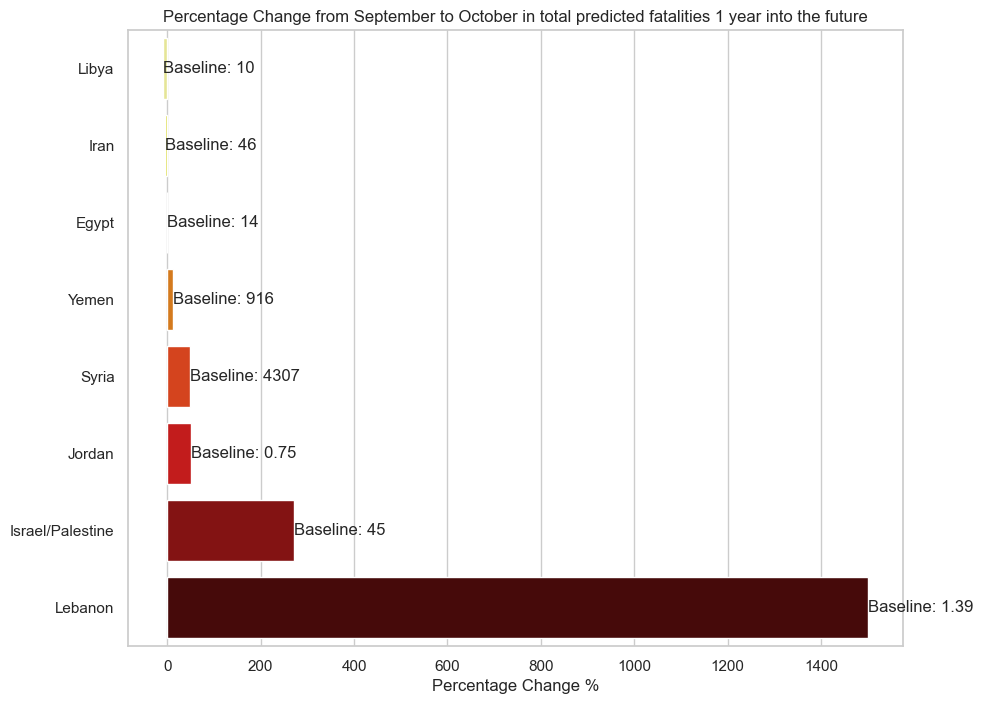

In [91]:

#Plot the figure based on df_plot

# Set the style
sns.set(style="whitegrid")

# Generate a color palette from the hot_r colormap
base_palette = sns.color_palette("hot_r", len(df_plot['Countries']))

# Adjusting saturation to reduce contrast
saturation_factor = 0.7  # You can adjust this value to control the saturation

# Adjusting alpha to make the colors lighter
alpha_factor = 0.95  # You can adjust this value to control the lightness

# Create a custom colormap with adjusted saturation and alpha
adjusted_cmap = mcolors.LinearSegmentedColormap.from_list(
    "adjusted_hot_r", 
    mcolors.colorConverter.to_rgba_array(base_palette, alpha=None) * alpha_factor, 
    N=len(df_plot['Countries'])
)

# Create a color palette using the custom colormap
adjusted_palette = sns.color_palette(adjusted_cmap(np.linspace(0, 1, len(df_plot['Countries']))))

# Plotting with Seaborn
plt.figure(figsize=(10, 8))

barplot = sns.barplot(y='Countries', x='percentage_change', data=df_plot, palette=adjusted_palette)

# Add labels and title
plt.xlabel('Percentage Change %')
plt.title('Percentage Change from September to October in total predicted fatalities 1 year into the future')

# Label x-ticks and add baseline annotations
for i, country in enumerate(df_plot['Countries']):
    baseline_value = df_plot['base_line'][i]
    baseline_text = f'{baseline_value:.0f}' if baseline_value == int(baseline_value) else f'{baseline_value:.2f}'
    plt.text(df_plot['percentage_change'][i] + 0.02, i, f'Baseline: {baseline_text}', va='center')

# Show the plot
# plt.show()

# Save the plot
filename = f'{desktop}/cm' + 'preds' + 'perc_change' + '.png'
plt.savefig(filename, dpi=200)

# Barplots of predictions based on september and october

In [24]:
#Aggregating the 36 months into the future
df_sept2 = future_sept.groupby('country_id')['step_combined'].sum().reset_index()
df_oct2 = future_oct.groupby('country_id')['step_combined'].sum().reset_index()

In [29]:
#Select contries that you want to plot 
selected_countries = [218,62, 94, 220,124] 

In [30]:
#Filter out those countries 
df_sept2_subset=df_sept2.query(f'country_id=={selected_countries}')
df_oct2_subset=df_oct2.query(f'country_id=={selected_countries}')

In [35]:
df_oct2_subset

,country_id,step_combined,Month
56,62,11.307030,October
82,94,103.874479,October
110,124,6485.447154,October
176,218,420.250503,October
177,220,21051.066884,October


In [43]:
# Combine the data frames for easier plotting
df_sept2_subset['Last input data'] = 'September'
df_oct2_subset['Last input data'] = 'October'

df_combined = pd.concat([df_sept2_subset, df_oct2_subset])

In [152]:
df_combined

,country_id,step_combined,Month,Last input data,country_name
56,62,8.535307,September,September,Jordan
82,94,17.060208,September,September,Lebanon
110,124,5246.697346,September,September,Yemen
176,218,132.662398,September,September,Israel/Palestine
177,220,14602.987053,September,September,Syria
56,62,11.307030,October,October,Jordan
82,94,103.874479,October,October,Lebanon
110,124,6485.447154,October,October,Yemen
176,218,420.250503,October,October,Israel/Palestine
177,220,21051.066884,October,October,Syria


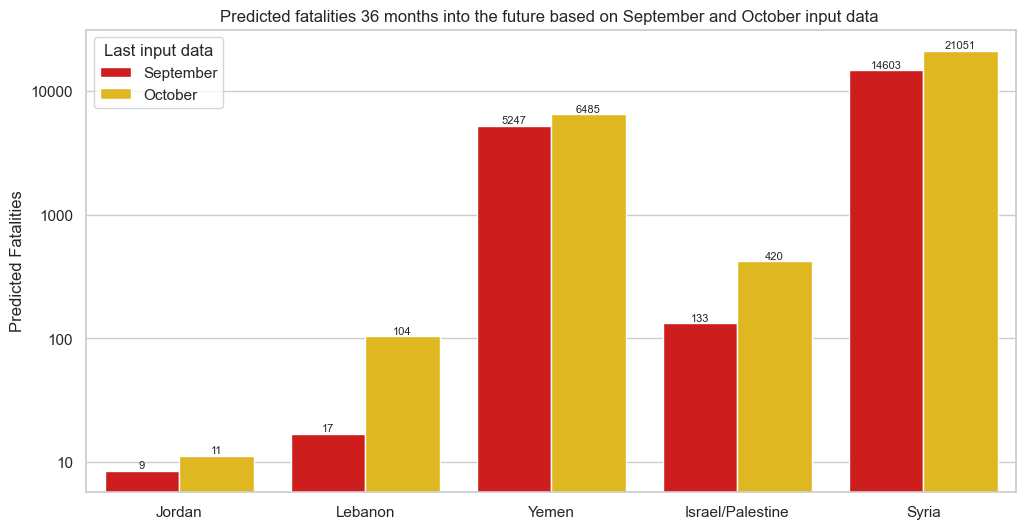

In [88]:
import matplotlib.ticker as ticker

# Assuming country_mapping is a DataFrame with columns 'country_id' and 'country_name'
# Example:
country_mapping = pd.DataFrame({'country_id': [62, 94, 124, 218, 220], 'country_name': ['Jordan', 'Lebanon', 'Yemen', 'Israel/Palestine', 'Syria']})

# Create a mapping dictionary
id_to_name_mapping = dict(zip(country_mapping['country_id'], country_mapping['country_name']))

# Replace 'country_id' with 'country_name' in the df_combined DataFrame
df_combined['country_name'] = df_combined['country_id'].replace(id_to_name_mapping)

# Set the style
sns.set(style="whitegrid")

# Plotting with Seaborn using a logarithmic y-axis scale
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='country_name', y='step_combined', hue='Last input data', data=df_combined, palette='hot')

# Set y-axis to logarithmic scale
plt.yscale('log')

# Use ScalarFormatter to display actual values on the y-axis ticks
formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)

# Add labels and title
plt.xlabel(None)
plt.ylabel('Predicted Fatalities')
plt.title('Predicted fatalities 36 months into the future based on September and October input data ')

# Add values as text annotations above each bar
for p in barplot.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height, f'{height:.0f}', ha="center", va="bottom", fontsize=8)

# Show the plot
#plt.show()

filename = f'{desktop}/cm' + 'preds' + 'region' + 'change' + '.png'
plt.savefig(filename, dpi=200)

## Plotting overtime figures 

In [49]:
#Creates a model list with the two datasets merged together
#model={}
#model['calib_and_test'] = pd.concat([calib, test], axis =0) 

model={}
model['calib'] = calib

#Only using calib partition

#Appends the modellist 
ModelList = []
ModelList.append(model)

In [51]:
# Construct a set of step-combined series starting from a series of start months
# -- to see how predictions react to events at different calendar times
#for model in ModelList:
#    print(model['modelname'])
df = model['calib']
last_in_training = 409
last_in_test = 456
# t_range specifies the duration of the step-combined series to construct
t_range = range(0, 48)#80 
step_range = range(1,36)
model['sc_df'] = pd.DataFrame(df['ln_ged_sb_dep'])
for month in t_range:
    # Create a column to hold predictions starting from a given "last observed" month
    col = 'sc_' + str(last_in_training + month)
#  print(col)
    model['sc_df'][col] = np.NaN
    for step in step_range:
        if (last_in_training + month+step) <= last_in_test: # To avoid generating series beyond last month in partition
            predcol = 'step_pred_' + str(step) # The column in the in-df that contains predictions for this step
#            print('For month', last_in_training + month + step, 'use', predcol, last_in_training + step + month)
            model['sc_df'][col].loc[[last_in_training + month + step], :] = df[predcol].loc[last_in_training + step + month,:].values
model['sc_df_smooth']=model['sc_df'].rolling(3,center=True).mean().groupby(level=1)   
    # Sub-list of predictions by country 
    
model['CountryList'] = []
countries = model['calib'].index.unique(level='country_id').tolist()
for cnt in range(250):
    cntdict = {
    'country_id': cnt,
    'country_name': ''
    }
    if cnt in countries:
            cntdict['country_id'] = cnt
            cntdict['calib'] = model['calib'].xs(cnt, level='country_id').copy()
            cntdict['sc_df'] = model['sc_df'].xs(cnt, level='country_id')
            cntdict['sc_df_smooth'] = cntdict['sc_df'].copy()
            predcols = cntdict['sc_df_smooth'].columns[1:]
            cntdict['sc_df_smooth'][predcols] = cntdict['sc_df'][predcols].rolling(3,center=True).mean()
            cntdict['sc_df_smooth'] = cntdict['sc_df_smooth'].fillna(cntdict['sc_df'])
    model['CountryList'].append(cntdict)
    

In [55]:
# Plotting the bar chart

month_value = np.array([410, 420, 430, 440, 450]) # 458, 464, 470, 476, 482, 488, 494, 500
month_name = ['February 2014', 'December 2014', 'October 2015', 'August 2016', 'June 2017'] #'Feb-2018','Aug-2018', 'Feb-2019', 'Aug-2019', 'Feb-2020', 'Aug-2020', 'Feb-2021', 'Aug-2021'


CountryList = [
#    ('DR Congo',167,20000),
#    ('Egypt',222,1000),
#    ('Ethiopia',57,2000),
#    ('Gabon',169,500),
#    ('Iran',128,1000),
    ('Israel_Palestine',218,6000),
#    ('Jordan',62,1000),
#    ('Kenya',237,2000),
#    ('Lebanon',94,1000),
#    ('Libya',213,1000),
#    ('Madagascar',172,2000),
#    ('Mali',50,20000),
#    ('Mauritania',244,500),
#    ('Morocco',243,500),
#    ('Sudan',245,2000),
#    ('Syria',220,50000),
#    ('Tanzania',242,500),
#    ('Uganda',235,2000),
#    ('Yemen',124,20000),
#    ('Zimbabwe',158,5000),   
]

for cnt in CountryList:
    plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
#       print(cnt)
    sc_df = model['CountryList'][cnt[1]]['sc_df']
    months = sc_df.index.to_series()
    sc_df_exp = sc_df.copy()
    sc_df_cum = sc_df.copy()
        # Loop over all steps for each country
    for column in sc_df.columns:
        sc_df_exp[column]=np.rint(np.expm1(sc_df[column]))
        sc_df_cum[column]=sc_df_exp[column].cumsum(axis=0, skipna = True)
    sc_df_cumtemp = sc_df_cum.copy()
#         Set first value of an sc series to the cumulated count up to t-1 (cct1 below)
#    cumdepvar = sc_df_cum['ln_ged_sb_dep']#.shift(1) # A  cumulative dependent variable series
#    i = first_month + 1
#    for column in sc_df.columns[2:]:
#        cct1 = cumdepvar[i]
#        sc_df_cum[column]=sc_df_cum[column]+cct1
#        i = i + 1
        
    df = pd.DataFrame(sc_df_exp)

# Extracting columns 2 to 25 and finding the maximum for each row
    max_values = df.iloc[:, 1:26].max(axis=1)

    plt.bar(max_values.index, max_values, color=cm.hot(np.abs(((max_values.index-409)/90)+.2)))

# Transparent bars for "ln_ged_sb_dep" column #But we don't want this... 
#plt.bar(df.index, df['ln_ged_sb_dep'], alpha=0.5, color='gray', label='ln_ged_sb_dep')        

# Adding labels and title
#plt.xlabel('February 2014', 'December 2014', 'October 2015', 'August 2016', 'June 2017') 
    plt.ylabel('Predicted fatalities 36 months into the future')
    plt.title(f'Predicted fatalities 36 months into the future with different input data ' + cnt[0])

    plt.xticks(month_value, month_name, rotation=30)

    # Display the plot
   # plt.show()
    filename = f'{desktop}/cm' + 'preds' + cnt[0] + '.png'
    plt.savefig(filename, dpi=200)
    plt.close()

## Plotting actuals

In [97]:
#Querying actuals 
qs_ged_cm = (Queryset("SN_cm_ged_data_no_transforms", "country_month")

# identifiers
             
.with_column(Column('year', from_table = 'month', from_column = 'year_id'))
.with_column(Column('month', from_table = 'month', from_column = 'month'))
.with_column(Column('country_name', from_table = 'country', from_column = 'name'))

# non-logged target variable GED fatalities
         
.with_column(Column("ged_best_sb", from_table = "ged2_cm", from_column = "ged_sb_best_sum_nokgi")
             #.transform.missing.fill()
            )                   
.with_column(Column("ged_best_os", from_table = "ged2_cm", from_column = "ged_os_best_sum_nokgi")
             #.transform.missing.fill()
            )   
.with_column(Column("ged_best_ns", from_table = "ged2_cm", from_column = "ged_ns_best_sum_nokgi")
             #.transform.missing.fill()
            )  
              )
      
qs_ged_cm = qs_ged_cm.publish().fetch()

print(f"A dataset with {len(qs_ged_cm.columns)} columns, with "
      f"data between t {min(qs_ged_cm.index.get_level_values(0))} "
      f"and {max(qs_ged_cm.index.get_level_values(0))}. "
      f"({len(np.unique(qs_ged_cm.index.get_level_values(1)))} units)"
     )

 .    A dataset with 6 columns, with data between t 1 and 852. (213 units)


In [155]:
New_beginning = 493

#Filter out the time-period wanted
ged_cm_subset= qs_ged_cm.query(f'month_id >= {StartOfHistory} and month_id <= {EndOfHistory}')

ged_cm_subset # displays the subset

year  month         country_name  ged_best_sb  \
month_id country_id                                                  
469      1           2019      1               Guyana          0.0   
         2           2019      1             Suriname          0.0   
         3           2019      1  Trinidad and Tobago          0.0   
         4           2019      1            Venezuela          0.0   
         5           2019      1                Samoa          0.0   
...                   ...    ...                  ...          ...   
526      242         2023     10             Tanzania          0.0   
         243         2023     10              Morocco          0.0   
         244         2023     10           Mauritania          0.0   
         245         2023     10                Sudan        166.0   
         246         2023     10          South Sudan          0.0   

                     ged_best_os  ged_best_ns  
month_id country_id                            
469      1                   0.0          0.0  
         2                   0.0          0.0  
         3                   0.0          0.0  
         4                  22.0          0.0  
         5                   0.0          0.0  
...                          ...          ...  
526      242                 0.0          0.0  
         243                 0.0          0.0  
         244                 0.0          0.0  
         245                15.0         16.0  
         246                 0.0          0.0  

[11078 rows x 6 columns]

In [254]:
#Subset for Israel
country=218

ged_Israel_subset=ged_cm_subset.query(f'country_id=={country}')

In [157]:
ged_Israel_subset = ged_Israel_subset.reset_index()
ged_Israel_subset

,month_id,country_id,year,month,country_name,ged_best_sb,ged_best_os,ged_best_ns
0,469,218,2019,1,Israel,2.0,0.0,0.0
1,470,218,2019,2,Israel,0.0,0.0,0.0
2,471,218,2019,3,Israel,3.0,2.0,0.0
3,472,218,2019,4,Israel,0.0,1.0,0.0
4,473,218,2019,5,Israel,30.0,0.0,0.0
5,474,218,2019,6,Israel,0.0,0.0,0.0
6,475,218,2019,7,Israel,0.0,0.0,0.0
7,476,218,2019,8,Israel,6.0,0.0,0.0
8,477,218,2019,9,Israel,0.0,0.0,0.0
9,478,218,2019,10,Israel,0.0,0.0,0.0


In [165]:
df = pd.melt(ged_Israel_subset, id_vars=['month_id'], value_vars=['ged_best_sb','ged_best_os','ged_best_ns'])

In [166]:
df

,month_id,variable,value
0,469,ged_best_sb,2.0
1,470,ged_best_sb,0.0
2,471,ged_best_sb,3.0
3,472,ged_best_sb,0.0
4,473,ged_best_sb,30.0
...,...,...,...
169,522,ged_best_ns,0.0
170,523,ged_best_ns,11.0
171,524,ged_best_ns,19.0
172,525,ged_best_ns,24.0


In [233]:
# Set the style
sns.set(style="whitegrid")

# Define months
month_value = [472, 476, 480, 484, 488, 492, 496, 500, 504, 508, 512, 516, 520, 524]
month_name = ['April 2019', 'August 2019', 'December 2019', 'April 2020', 'August 2020', 'December 2020', 'April 2021',
              'August 2021', 'December 2021', 'April 2022', 'August 2022', 'December 2022', 'April 2023', 'August 2023']

# Define countries
CountryList = [('Israel_Palestine', 218, 6000)]  # Add other countries if needed

for cnt in CountryList:
    plt.figure(figsize=(12,10))

    # Filter data for the specific country
    df_test = ged_Israel_subset[ged_Israel_subset['country_id'] == cnt[1]]

    # Define the number of categories
    num_categories = 3

    # Add a gap between bars within each group
    bar_gap = 0.6

    
    #cm.hot(np.abs(((max_values.index-469)/75)+.1))
    # Plot bars centered on each month
    bar_width = 0.8  # Adjust this value based on your preference
    plt.bar(df_test.month_id - bar_width - bar_gap, df_test.ged_best_sb, width=bar_width, color=cm.hot(np.abs(((max_values.index-469)/75)+.1)))#, label='State-Based Fatalities'
#    plt.bar(df_test.month_id, df_test.ged_best_os, width=bar_width, color='yellow', label='ged_best_os')
#    plt.bar(df_test.month_id + bar_width + bar_gap, df_test.ged_best_ns, width=bar_width, color='orange', label='ged_best_ns')

    # Set y-axis to logarithmic scale
    plt.yscale('log')

    # Use ScalarFormatter to display actual values on the y-axis ticks
    formatter = ticker.ScalarFormatter()
    formatter.set_scientific(False)
    plt.gca().yaxis.set_major_formatter(formatter)

    # Adding labels and title
    plt.ylabel('Recorded State-Based Fatalities')
    plt.title('Recorded State-Based Fatalities in Israel/Palestine')

    plt.xticks(month_value, month_name, rotation=30) 

    # Add legend
#    plt.legend()

    # Save the plot
    filename = f'{desktop}/fatalities_sb_{cnt[0]}.png'
    print(filename)
    plt.savefig(filename, dpi=200)
    plt.close()

/Users/sofia/Desktop/Gaza2023/final/fatalities_sb_Israel_Palestine.png


In [248]:
country=[218]

#future526 to future514
#future526

df_526=future526.query(f'country_id=={country}')
df_525=future525.query(f'country_id=={country}')
df_524=future524.query(f'country_id=={country}')
df_523=future523.query(f'country_id=={country}')
df_522=future522.query(f'country_id=={country}')
df_521=future521.query(f'country_id=={country}')
df_520=future520.query(f'country_id=={country}')
df_519=future519.query(f'country_id=={country}')
df_518=future518.query(f'country_id=={country}')
df_517=future517.query(f'country_id=={country}')
df_516=future516.query(f'country_id=={country}')
df_515=future515.query(f'country_id=={country}')
df_514=future514.query(f'country_id=={country}')

df_526=df_526.reset_index()
df_525=df_525.reset_index()
df_524=df_524.reset_index()
df_523=df_523.reset_index()
df_522=df_522.reset_index()
df_521=df_521.reset_index()
df_520=df_520.reset_index()
df_519=df_519.reset_index()
df_518=df_518.reset_index()
df_517=df_517.reset_index()
df_516=df_516.reset_index()
df_515=df_515.reset_index()
df_514=df_514.reset_index()

In [249]:
df_514

feature,month_id,country_id,step_combined
0,515,218,6.022354
1,516,218,3.399369
2,517,218,3.946018
3,518,218,5.278154
4,519,218,4.182643
5,520,218,3.833395
6,521,218,4.297736
7,522,218,3.806945
8,523,218,3.398191
9,524,218,3.076505


In [251]:
ged_Israel_subset

,month_id,country_id,year,month,country_name,ged_best_sb,ged_best_os,ged_best_ns
0,469,218,2019,1,Israel,2.0,0.0,0.0
1,470,218,2019,2,Israel,0.0,0.0,0.0
2,471,218,2019,3,Israel,3.0,2.0,0.0
3,472,218,2019,4,Israel,0.0,1.0,0.0
4,473,218,2019,5,Israel,30.0,0.0,0.0
5,474,218,2019,6,Israel,0.0,0.0,0.0
6,475,218,2019,7,Israel,0.0,0.0,0.0
7,476,218,2019,8,Israel,6.0,0.0,0.0
8,477,218,2019,9,Israel,0.0,0.0,0.0
9,478,218,2019,10,Israel,0.0,0.0,0.0


In [255]:
New_beginning = 513

#Filter out the time-period wanted
ged_Israel_subset= ged_Israel_subset.query(f'month_id >= {New_beginning} and month_id <= {EndOfHistory}')

ged_Israel_subset

,,year,month,country_name,ged_best_sb,ged_best_os,ged_best_ns
month_id,country_id,,,,,,
513,218,2022,9,Israel,11.0,0.0,2.0
514,218,2022,10,Israel,17.0,1.0,0.0
515,218,2022,11,Israel,9.0,0.0,0.0
516,218,2022,12,Israel,6.0,0.0,0.0
517,218,2023,1,Israel,17.0,1.0,0.0
518,218,2023,2,Israel,20.0,3.0,1.0
519,218,2023,3,Israel,19.0,1.0,0.0
520,218,2023,4,Israel,3.0,1.0,0.0
521,218,2023,5,Israel,57.0,2.0,0.0


In [259]:
ged_Israel_subset=ged_Israel_subset.reset_index()

In [341]:
# Set the style
sns.set(style='white')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 10))

# Plotting the bar chart
ax.bar(ged_Israel_subset['month_id'], ged_Israel_subset['ged_best_sb'], color='0.8')

# Plotting the line graphs with 'hot' color theme and no labels
line_graphs = [df_526, df_525, df_524, df_523, df_522, df_521, df_520, df_519, df_518, df_517, df_516, df_515, df_514]

for i, line_df in enumerate(line_graphs):
    ax.plot(line_df['month_id'], line_df['step_combined'], color=cm.hot((i * 0.79 / len(line_graphs)) + 0.2), label=None)

# Set y-axis to logarithmic scale (optional)
ax.set_yscale('log')

# Use ScalarFormatter to display actual values on the y-axis ticks
formatter = ticker.ScalarFormatter()
formatter.set_scientific(True)
ax.yaxis.set_major_formatter(formatter)

# Adding labels and title
ax.set_ylabel('Number of Fatalities')
ax.legend()

# Manually set x-ticks for specific month_ids
custom_xticks = np.array([514, 520, 526, 532, 538, 544, 550, 556])
custom_labels = ['October 2022', 'April 2023', 'October 2023', 'April 2024', 'October 2024', 'April 2025', 'October 2025', 'April 2026']
ax.set_xticks(custom_xticks)
ax.set_xticklabels(custom_labels, rotation=50)
print(plt.xticks())
# And a corresponding grid
ax.grid(which='major')

# Or if you want different settings for the grids:
ax.grid(which='major', alpha=0.5)
#ax.grid(which='major', alpha=0.5)



# Show the plot
#plt.show()

# Save the plot
filename = f'{desktop}/overtime_Israel_Palestine.png'
print(filename)
plt.savefig(filename, dpi=200)
plt.close()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(array([514, 520, 526, 532, 538, 544, 550, 556]), [Text(514, 0, 'October 2022'), Text(520, 0, 'April 2023'), Text(526, 0, 'October 2023'), Text(532, 0, 'April 2024'), Text(538, 0, 'October 2024'), Text(544, 0, 'April 2025'), Text(550, 0, 'October 2025'), Text(556, 0, 'April 2026')])
/Users/sofia/Desktop/Gaza2023/final/overtime_Israel_Palestine.png
